<a href="https://colab.research.google.com/github/Vivek-ML001/Fraud_prediction/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('/content/FastagFraudDetection.csv')

# Display the first few rows and basic info
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()

First 5 rows of the dataset:
   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.0598161

In [3]:
df.shape

(5000, 13)

In [5]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
df.isnull().sum()

,0
Transaction_ID,0
Timestamp,0
Vehicle_Type,0
FastagID,549
TollBoothID,0
Lane_Type,0
Vehicle_Dimensions,0
Transaction_Amount,0
Amount_paid,0
Geographical_Location,0


In [7]:
df.duplicated().sum()

np.int64(0)

# Preprocess the Data and Engineer Features ⚙️

In [8]:
df['Shortfall_Amount'] = df['Transaction_Amount'] - df['Amount_paid']

In [9]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Shortfall_Amount
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,230
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,20
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,0
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,230
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,40


In [10]:
# Convert Timestamp to datetime and extract the hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour_of_Day'] = df['Timestamp'].dt.hour

In [12]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Shortfall_Amount,Hour_of_Day
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,230,11
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,20,14
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,0,18
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,230,2
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,40,6


# Drop Unnecessary Columns
We'll remove columns that are just identifiers or are not useful for building a general prediction model, like IDs and the original timestamp.

In [13]:
# Drop columns that are not needed for modeling
df = df.drop(['Transaction_ID', 'Timestamp', 'FastagID', 'Geographical_Location', 'Vehicle_Plate_Number'], axis=1)

In [14]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Shortfall_Amount,Hour_of_Day
0,Bus,A-101,Express,Large,350,120,65,Fraud,230,11
1,Car,B-102,Regular,Small,120,100,78,Fraud,20,14
2,Motorcycle,D-104,Regular,Small,0,0,53,Not Fraud,0,18
3,Truck,C-103,Regular,Large,350,120,92,Fraud,230,2
4,Van,B-102,Express,Medium,140,100,60,Fraud,40,6


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

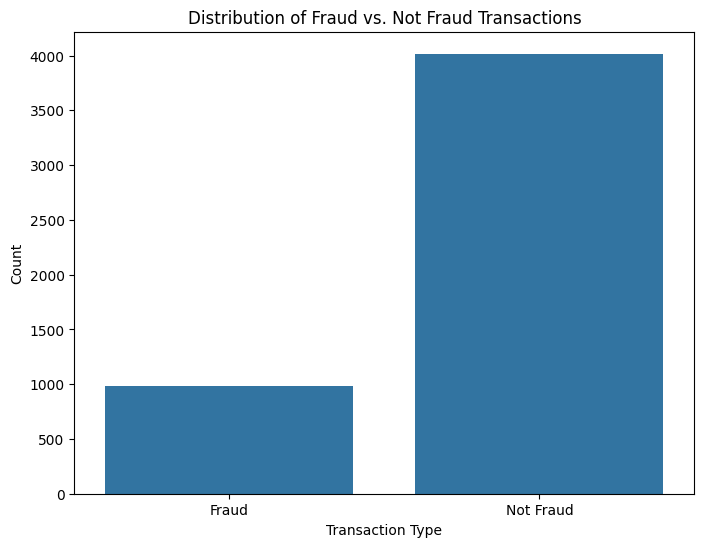

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Distribution of Fraud vs. Not Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.savefig('fraud_distribution.png')
# plt.close()

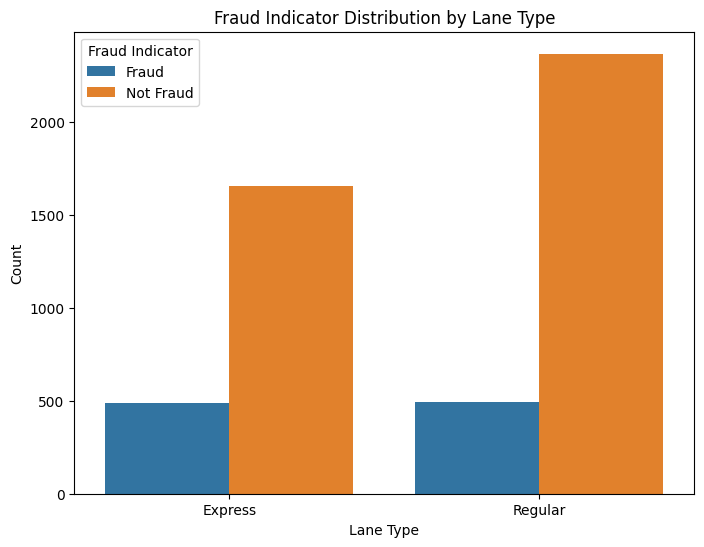

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df)
plt.title('Fraud Indicator Distribution by Lane Type')
plt.xlabel('Lane Type')
plt.ylabel('Count')
plt.legend(title='Fraud Indicator')
plt.show()

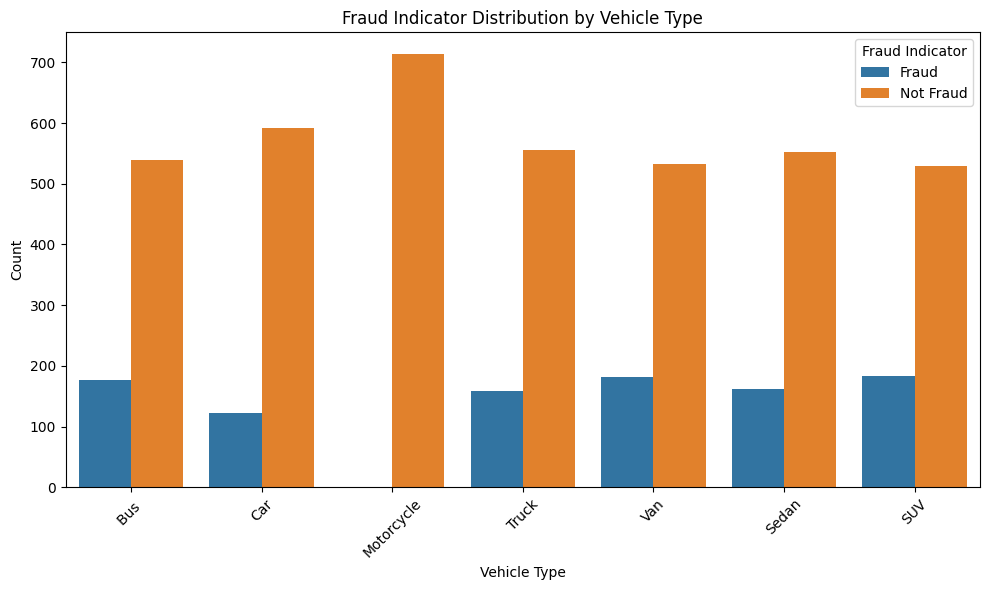

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df)
plt.title('Fraud Indicator Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.legend(title='Fraud Indicator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Group by TollBoothID and Fraud_indicator and count the occurrences
fraud_by_tollbooth = df.groupby(['TollBoothID', 'Fraud_indicator']).size().unstack(fill_value=0)

# Find the toll booth with the maximum number of fraudulent transactions
tollbooth_max_fraud = fraud_by_tollbooth['Fraud'].idxmax()

print(f"The TollBoothID with the maximum number of fraudulent transactions is: {tollbooth_max_fraud}")

The TollBoothID with the maximum number of fraudulent transactions is: B-102


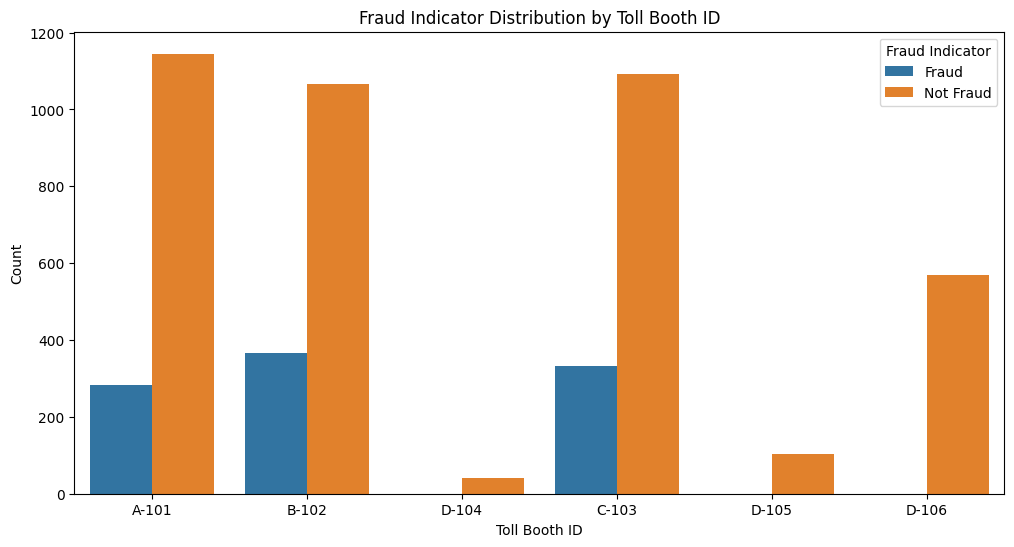

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='TollBoothID', hue='Fraud_indicator', data=df)
plt.title('Fraud Indicator Distribution by Toll Booth ID')
plt.xlabel('Toll Booth ID')
plt.ylabel('Count')
plt.legend(title='Fraud Indicator')
plt.show()

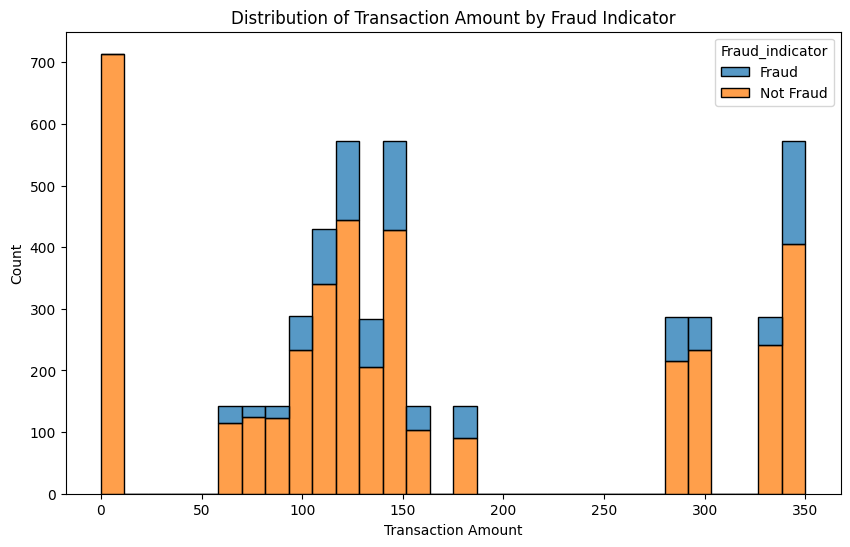

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Transaction_Amount', hue='Fraud_indicator', multiple='stack', bins=30)
plt.title('Distribution of Transaction Amount by Fraud Indicator')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.savefig('transaction_amount_hist.png')


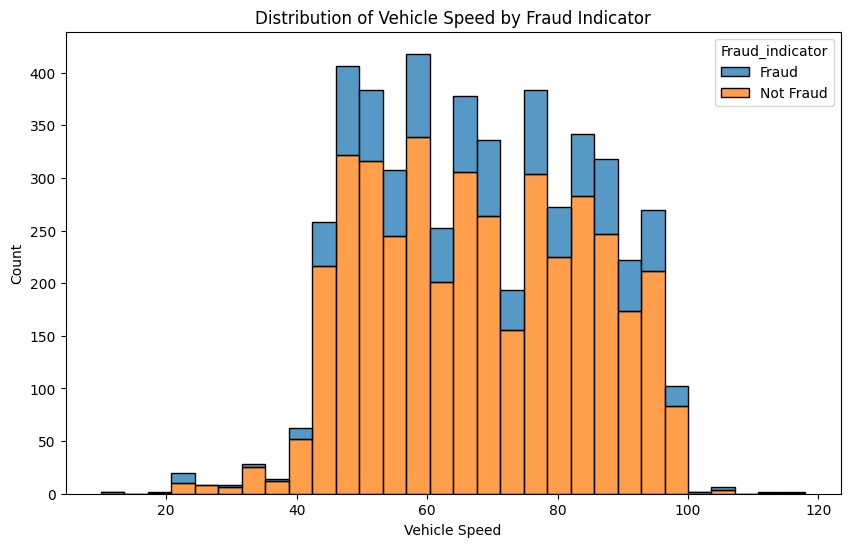

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Vehicle_Speed', hue='Fraud_indicator', multiple='stack', bins=30)
plt.title('Distribution of Vehicle Speed by Fraud Indicator')
plt.xlabel('Vehicle Speed')
plt.ylabel('Count')
plt.show()

# Encode Categorical Variables:
The model can only understand numbers, so we need to convert text-based columns into a numerical format. We'll use one-hot encoding for this.

In [26]:
# Convert categorical columns into numerical format using one-hot encoding
categorical_cols = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [27]:
df.head()

,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Shortfall_Amount,Hour_of_Day,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
0,350,120,65,Fraud,230,11,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,120,100,78,Fraud,20,14,True,False,False,False,False,False,True,False,False,False,False,True,False,True
2,0,0,53,Not Fraud,0,18,False,True,False,False,False,False,False,False,True,False,False,True,False,True
3,350,120,92,Fraud,230,2,False,False,False,False,True,False,False,True,False,False,False,True,False,False
4,140,100,60,Fraud,40,6,False,False,False,False,False,True,True,False,False,False,False,False,True,False


# Encode the Target Variable:
Finally, we'll convert our target column, Fraud_indicator, into a binary format where 1 represents 'Fraud' and 0 represents 'Not Fraud'.

In [28]:
# Convert the target variable 'Fraud_indicator' to 1s and 0s
df['Fraud_indicator'] = df['Fraud_indicator'].apply(lambda x: 1 if x == 'Fraud' else 0)

In [29]:
df.head()

,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Shortfall_Amount,Hour_of_Day,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
0,350,120,65,1,230,11,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,120,100,78,1,20,14,True,False,False,False,False,False,True,False,False,False,False,True,False,True
2,0,0,53,0,0,18,False,True,False,False,False,False,False,False,True,False,False,True,False,True
3,350,120,92,1,230,2,False,False,False,False,True,False,False,True,False,False,False,True,False,False
4,140,100,60,1,40,6,False,False,False,False,False,True,True,False,False,False,False,False,True,False


# Split the Data for Training and Testing splitting_train_test_data
We'll divide the data into two sets: one for training the model and another for testing its performance.

In [30]:
# Define features (X) and target (y)
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the Features ⚖️
Scaling ensures that all numerical features have a similar magnitude, which helps the logistic regression model perform better.

In [31]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# : Build and Train the Logistic Regression Model 🤖

In [32]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# Evaluate the Model's Performance ✅


In [33]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

Generated plots: fraud_distribution.png, transaction_amount_hist.png, vehicle_speed_hist.png, confusion_matrix.png


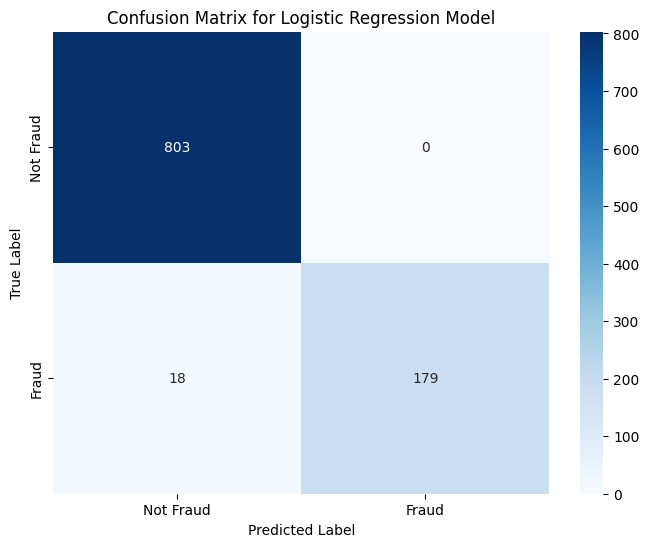

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')


print("Generated plots: fraud_distribution.png, transaction_amount_hist.png, vehicle_speed_hist.png, confusion_matrix.png")

In [37]:
# Print the evaluation metrics
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.982


In [38]:
print("\nConfusion Matrix:") print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[803   0]
 [ 18 179]]


In [39]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       803
           1       1.00      0.91      0.95       197

    accuracy                           0.98      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.98      0.98      0.98      1000



### Save the trained model
You can save your trained model to a file so you don't have to retrain it every time you want to use it. We'll use the `joblib` library for this.

In [40]:
import joblib

# Define the filename for the trained model
model_filename = 'logistic_regression_model.pkl'

# Save the trained model to the file
joblib.dump(model, model_filename)

print(f"Trained model saved to {model_filename}")

Trained model saved to logistic_regression_model.pkl


# Breakdown of Values

First, let's re-assign the numbers from the matrix:

True Positives (TP): 179 (Fraud correctly identified as Fraud)

True Negatives (TN): 803 (Not Fraud correctly identified as Not Fraud)

False Positives (FP): 0 (Not Fraud incorrectly flagged as Fraud)

False Negatives (FN): 18 (Fraud that was missed by the model)

#Total Predictions: 803 + 0 + 18 + 179 = 1000

#Key Performance Metrics

#🎯 Accuracy
What it answers: What percentage of predictions did the model get right overall?

#Formula: (TP + TN) / Total

Calculation: (179 + 803) / 1000 = 982 / 1000

Result: 98.2%

Your model is correct 98.2% of the time across all transactions.

#🔍 Precision
What it answers: Out of all the transactions the model predicted as fraud, how many were actually fraud?

#Formula: TP / (TP + FP)

Calculation: 179 / (179 + 0) = 179 / 179

Result: 100%

This is a perfect precision score. It means that when your model flags a transaction as fraudulent, it's 100% certain to be correct.

#🎣 Recall (also called Sensitivity)
What it answers: Out of all the actual fraudulent transactions, what percentage did the model successfully catch?

#Formula: TP / (TP + FN)

Calculation: 179 / (179 + 18) = 179 / 197

Result: ~90.9%

This metric reveals the model's primary weakness: it successfully catches about 91% of all fraudulent transactions, but it misses the other 9% (the 18 cases).

#⚖️ F1-Score
What it answers: What is the balanced score between Precision and Recall?

#Formula: 2 * (Precision * Recall) / (Precision + Recall)

Calculation: 2 * (1.0 * 0.909) / (1.0 + 0.909)

Result: ~95.2%

The F1-Score provides a single number that balances the trade-off between precision (not flagging innocent people) and recall (catching all the frauds). An F1-score of 95.2% is very strong.

In [41]:
import pickle
# Assuming 'scaler' is the StandardScaler object you fit on your training data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Scaler object saved as scaler.pkl")

Scaler object saved as scaler.pkl
